In [72]:
import tensorflow as tf


In [73]:
#Loading the dataset
f_mnist = tf.keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = f_mnist.load_data()

print("Training Examples: ",X_train.shape[0]) 
print("Testing Examples: ",X_test.shape[0])

Training Examples:  60000
Testing Examples:  10000


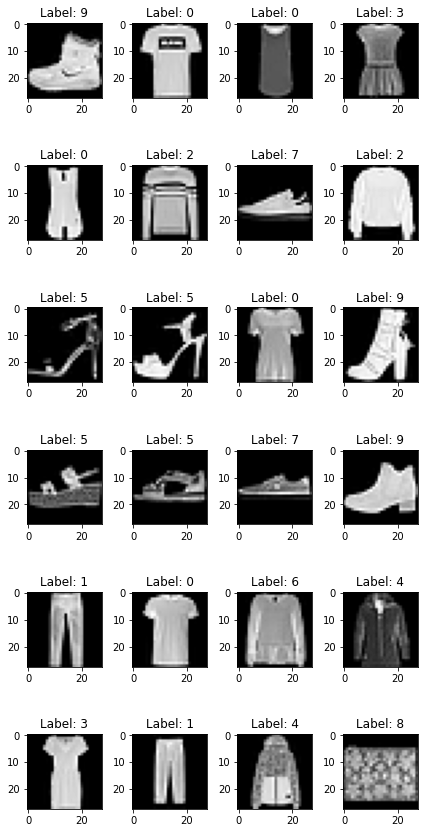

In [74]:
#Visualizing the images
import matplotlib.pyplot as plt
%matplotlib inline

n = 24
images = X_train[:n]
labels = Y_train[:n]

n_row = 6
n_col = 4
fig, axes = plt.subplots(n_row, n_col, figsize=(1.5*n_col,2*n_row))
for i in range(n):
    ax = axes[i//n_col, i%n_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()


In [75]:
#Data preprocessing by reshaping the data to feed the model
X_train = X_train.reshape(60000,28,28,1) #60000 training examples, 1-> Grey scale images
X_test = X_test.reshape(10000,28,28,1) #10000 test examples, 1-> Grey scale images

#Normalizing the data
X_train, X_test = X_train/255.0, X_test/255.0


In [76]:
#Creating Callback function to stop the model training when a specific accuracy or loss is achieved!

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy, so training is stopped!")
      self.model.stop_training = True

callbacks = myCallback()

In [77]:
# Creating our CNN model

model = tf.keras.models.Sequential([
                          tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
                          tf.keras.layers.MaxPooling2D(2, 2),
                          tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                          tf.keras.layers.MaxPooling2D(2, 2),
                          tf.keras.layers.Flatten(),
                          tf.keras.layers.Dense(256, activation='relu'),
                          tf.keras.layers.Dense(10, activation='softmax')
])

#Compiling our model using appropriate Optimizer, Loss Function and Metrics
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Displays summary of the model we built.
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               205056    
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [78]:
#Fitting our model
history = model.fit(X_train, Y_train,
                    epochs=30,
                    batch_size=32, 
                    callbacks=[callbacks])

Epoch 1/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4800 - accuracy: 0.8243
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3170 - accuracy: 0.8826
Epoch 3/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2708 - accuracy: 0.9004
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2408 - accuracy: 0.9110
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2156 - accuracy: 0.9194
Epoch 6/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1931 - accuracy: 0.9270
Epoch 7/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1739 - accuracy: 0.9345
Epoch 8/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1561 - accuracy: 0.9410
Epoch 9/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1409 - accuracy: 0.9466
Epoch 10/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.125

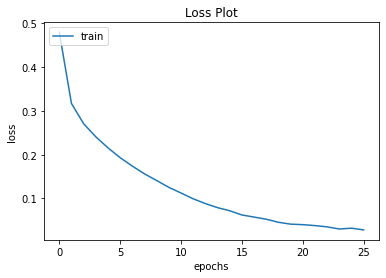

In [79]:
#Plotting train loss
#print(history.history.keys())
plt.plot(history.history['loss'])
plt.title("Loss Plot")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train'], loc='upper left')
plt.show()

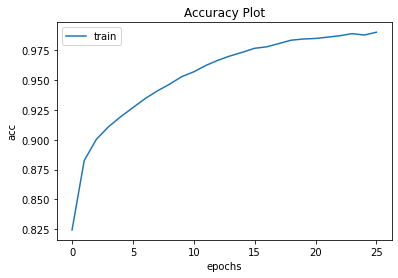

In [80]:
#Plotting train accuracy
plt.plot(history.history['accuracy'])
plt.title("Accuracy Plot")
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend(['train'], loc='upper left')
plt.show()

In [81]:
#Evaluation of the model on Testing images

test_loss, test_acc = model.evaluate(X_test, Y_test, batch_size=32)
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.6165 - accuracy: 0.9063
Test Loss:  0.6165370345115662
Test Accuracy:  0.9063000082969666


#Visualization of the Convolutions

In [100]:
#This cell prints the true labels of first 50 test images.
print(Y_test[:50])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2]


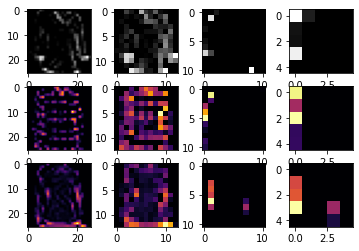

In [99]:
'''The following code shows the results of running convolutions on three images of same class.
On visualizing the output images, we can see many common features in images to be highlighted.'''

f, axarr = plt.subplots(3,4)
FIRST_IMAGE=4
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(X_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='gray')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(X_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(X_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)